#**CS 421: Data Mining**
>Data Classification


*   Decision Trees and
*   AdaBoost
*   Random Forests
*   Tune the hyper-parameters











# **Objectives**

```
1. Applying preprocessing techniques learnt before and see their effects on classification performance.
2. Exploring different classification models and tune their hyper-parameters
3. Exploring different techniques for evaluating classification models
4. Learning how to analyze observed results and explain observations in a detailed report

```




>Import Packages



In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import randint
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

> Read Data 



In [0]:
attr_names = ['Id', 'ClassLabel']
for i in range (1,31):
    attr_names.append("attr {}".format(i))


In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data' 
data = pd.read_csv(data_url, sep=',', names = attr_names)
print(data.shape)

(569, 32)


In [0]:
data.head(10)


,Id,ClassLabel,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18,attr 19,attr 20,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [0]:
#info about the dataset
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
Id            569 non-null int64
ClassLabel    569 non-null object
attr 1        569 non-null float64
attr 2        569 non-null float64
attr 3        569 non-null float64
attr 4        569 non-null float64
attr 5        569 non-null float64
attr 6        569 non-null float64
attr 7        569 non-null float64
attr 8        569 non-null float64
attr 9        569 non-null float64
attr 10       569 non-null float64
attr 11       569 non-null float64
attr 12       569 non-null float64
attr 13       569 non-null float64
attr 14       569 non-null float64
attr 15       569 non-null float64
attr 16       569 non-null float64
attr 17       569 non-null float64
attr 18       569 non-null float64
attr 19       569 non-null float64
attr 20       569 non-null float64
attr 21       569 non-null float64
attr 22       569 non-null float64
attr 23       569 non-null float64
attr 24       569 non-n

,Id,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18,attr 19,attr 20,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#1. Visualization and Dataset Splitting

>**Histogram** :



B    357
M    212
Name: ClassLabel, dtype: int64

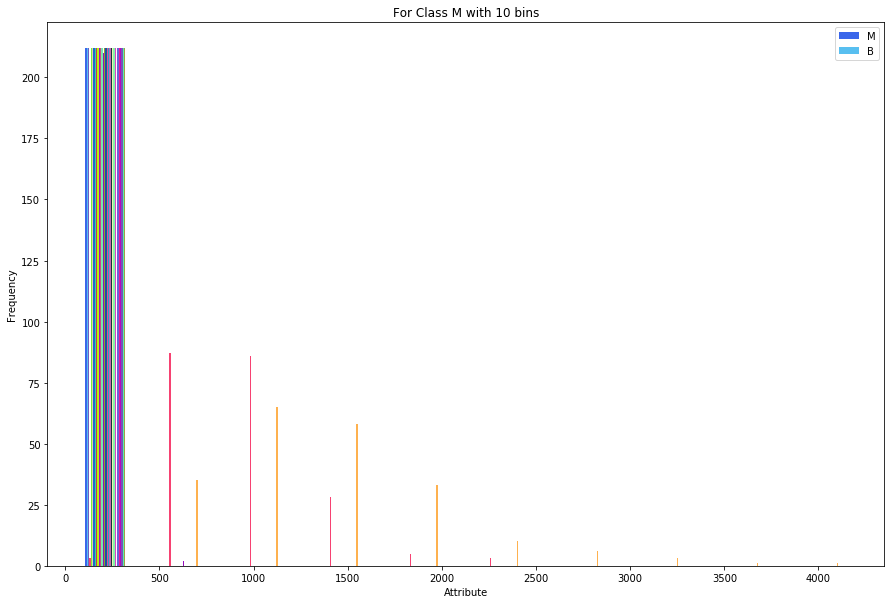

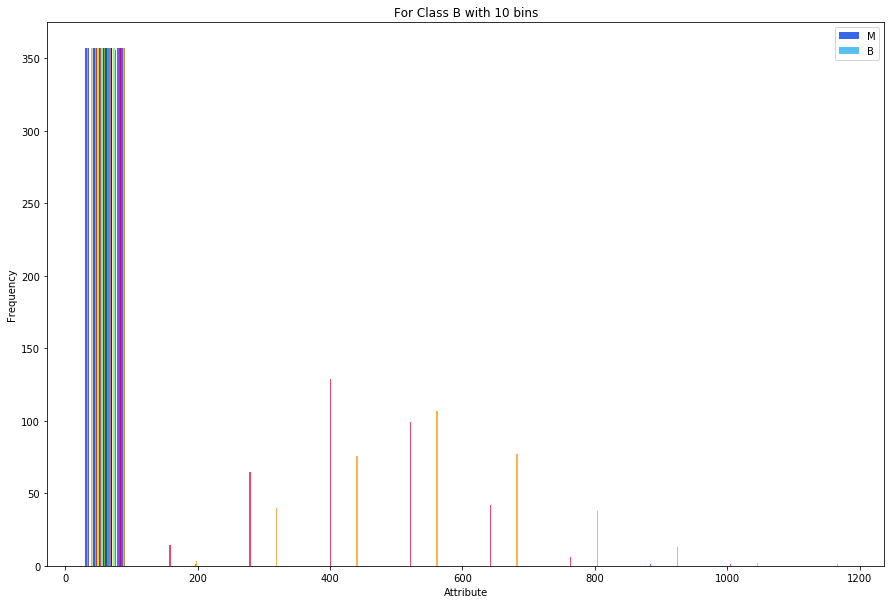

In [4]:
%matplotlib inline
#get all classes
purified_d = data.drop('Id', axis = 1)
c = purified_d['ClassLabel']
display(c.value_counts())
labels = c.unique()

#set the colors for attributes(Taken from a source online)
colors = []
for i in range(30):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
#Histograms with 10 Bins
for label in labels :
  plt.figure(figsize=(15,10))
  p1 = purified_d.loc[lambda df: df['ClassLabel'] == label].drop('ClassLabel', axis = 1)
  #display(p1)
  plt.hist(np.array(p1), bins=10, color=np.array(colors),label=labels, rwidth=0.5)
  #plt.hist(p1.values, 5, color=colors)
  plt.title('For Class %s with 10 bins' %label)
  plt.xlabel('Attribute')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

> **Box Plots**



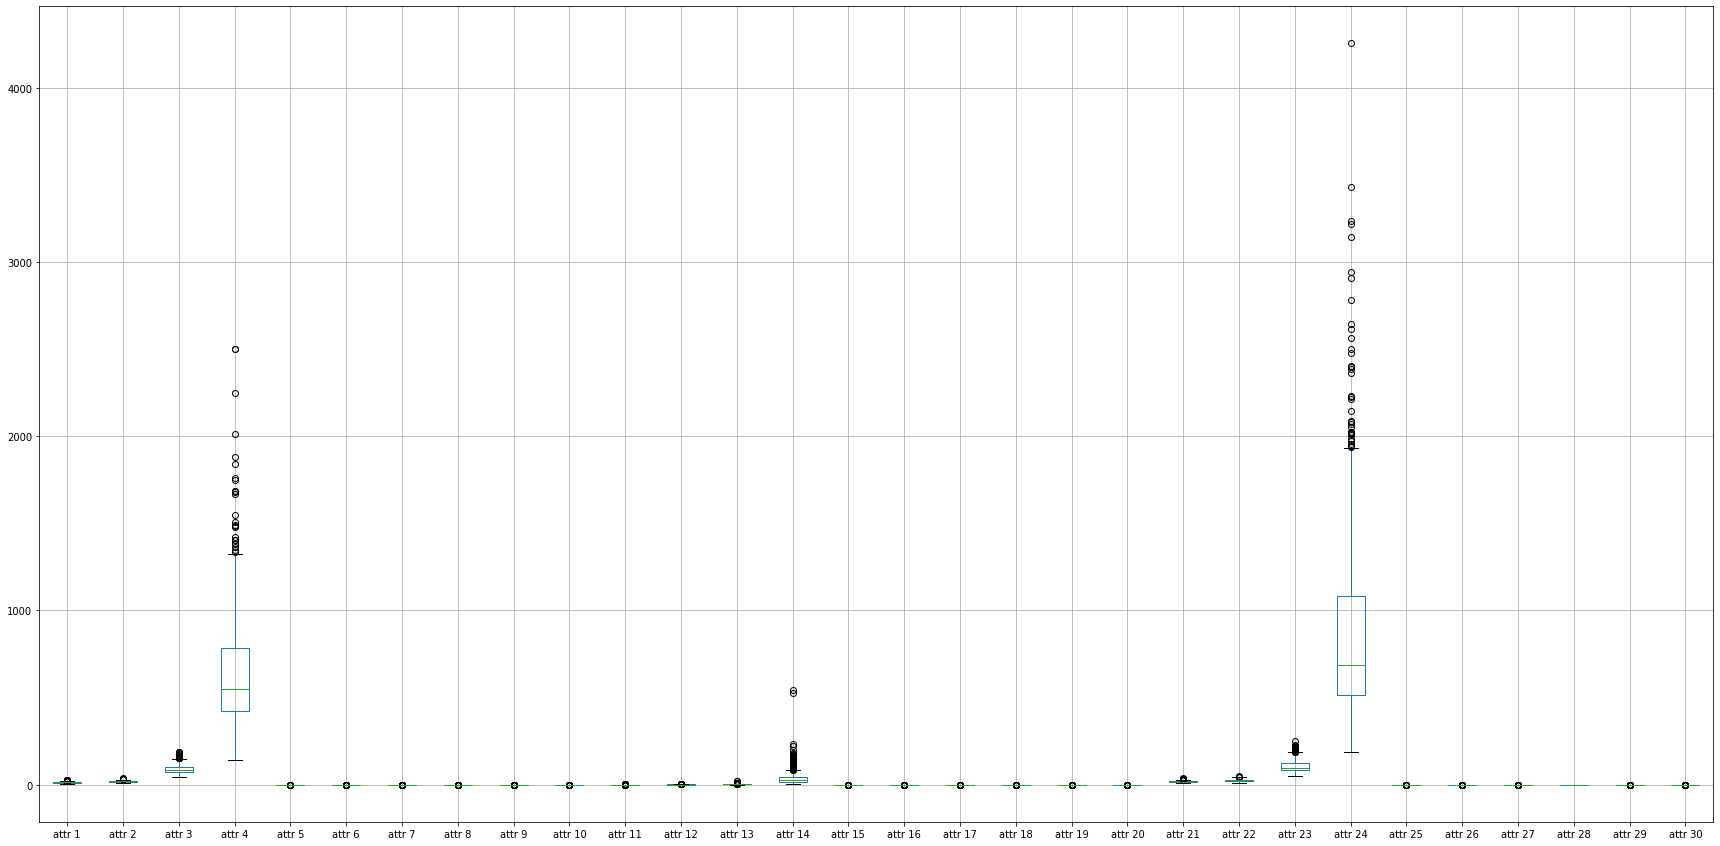

In [0]:
boxplot = data.iloc[:,2:].boxplot(column=attr_names[2:], figsize=(30,15))


**Observations:**
1.  Most of the values are around zero 
1.  attr 4, 14 and 24 have alot of outliears 
2.   attr 4 and attr 24  have more bigger and spread values









>**Scatter Plots**





>**Line Plot**



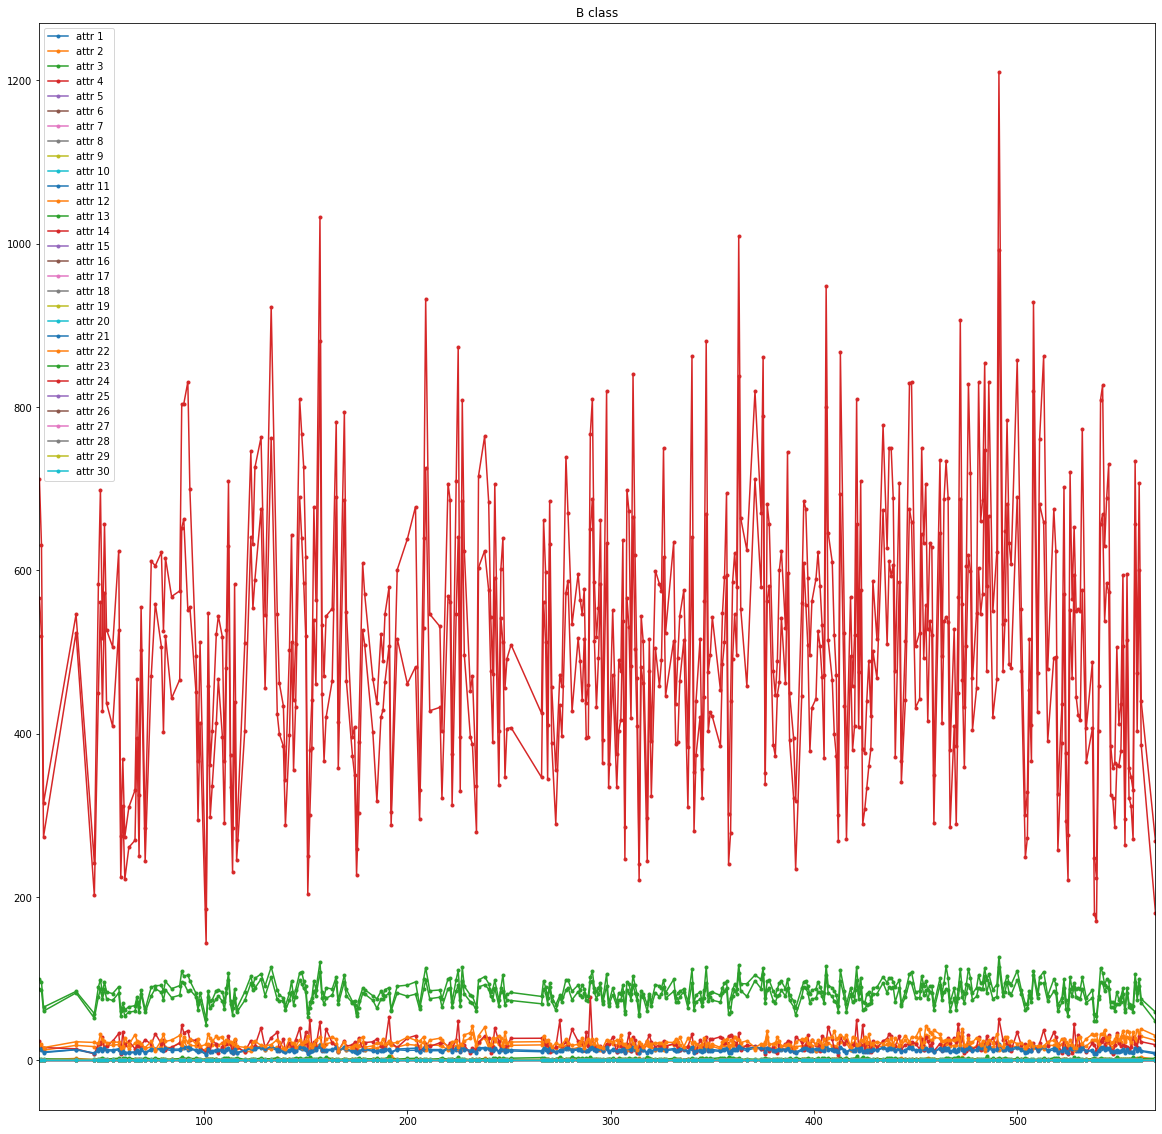

In [0]:
B_data = data.iloc[:,2:].loc[data['ClassLabel'] == "B"]
B_data.plot(style='.-', figsize=(20,20), title= "B class")

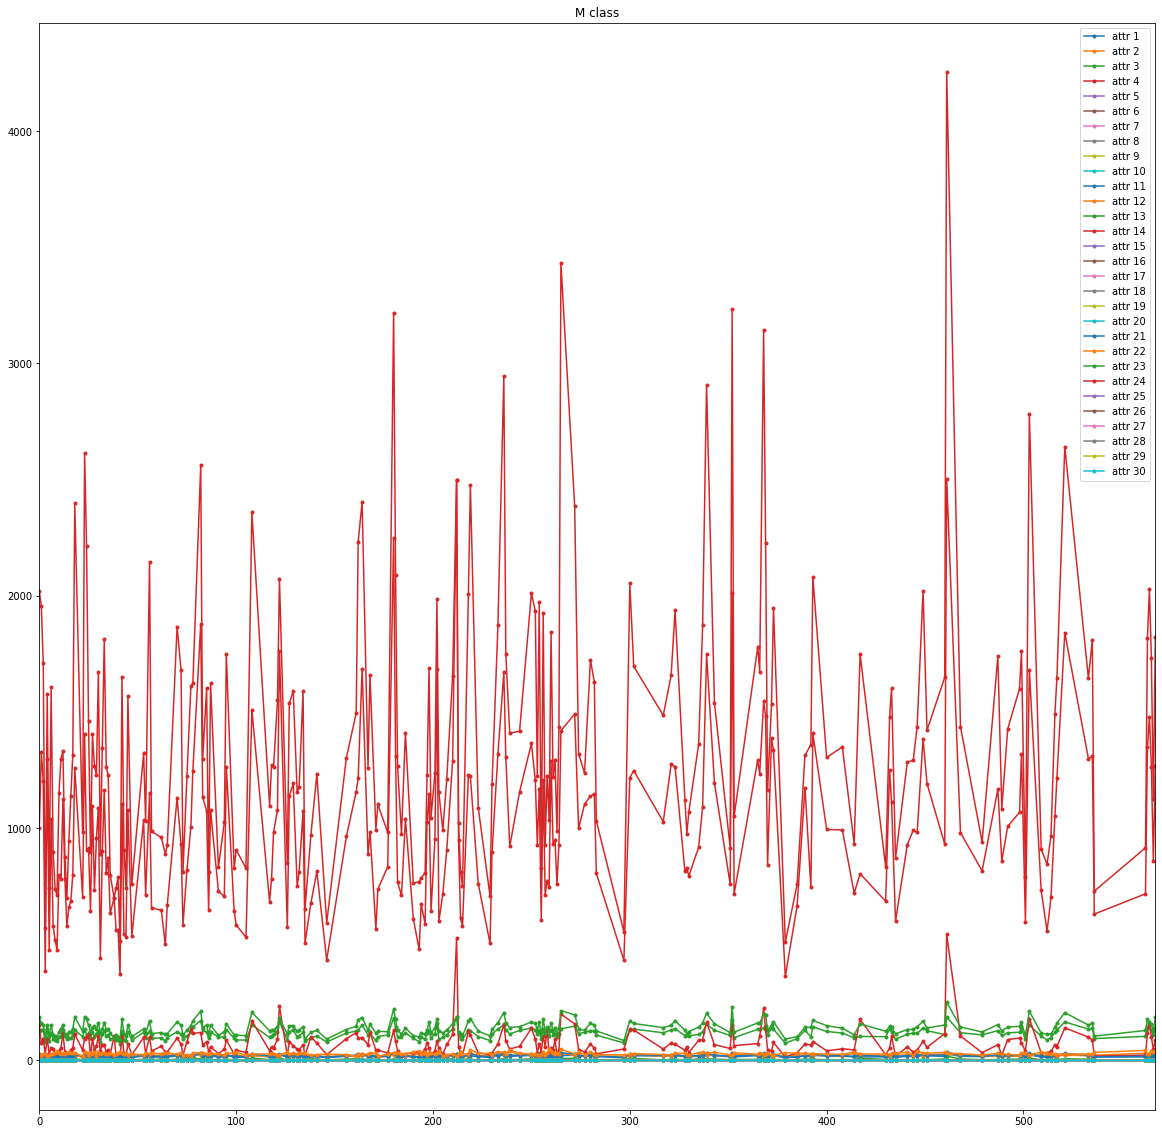

In [0]:
M_data = data.iloc[:,2:].loc[data['ClassLabel'] == "M"]
M_data.plot(style='.-', figsize=(20,20), title= "M class")


> **Correlation Matrix**



           attr 1    attr 2    attr 3  ...   attr 28   attr 29   attr 30
attr 1   1.000000  0.323782  0.997855  ...  0.744214  0.163953  0.007066
attr 2   0.323782  1.000000  0.329533  ...  0.295316  0.105008  0.119205
attr 3   0.997855  0.329533  1.000000  ...  0.771241  0.189115  0.051019
attr 4   0.987357  0.321086  0.986507  ...  0.722017  0.143570  0.003738
attr 5   0.170581 -0.023389  0.207278  ...  0.503053  0.394309  0.499316
attr 6   0.506124  0.236702  0.556936  ...  0.815573  0.510223  0.687382
attr 7   0.676764  0.302418  0.716136  ...  0.861323  0.409464  0.514930
attr 8   0.822529  0.293464  0.850977  ...  0.910155  0.375744  0.368661
attr 9   0.147741  0.071401  0.183027  ...  0.430297  0.699826  0.438413
attr 10 -0.311631 -0.076437 -0.261477  ...  0.175325  0.334019  0.767297
attr 11  0.679090  0.275869  0.691765  ...  0.531062  0.094543  0.049559
attr 12 -0.097317  0.386358 -0.086761  ... -0.119638 -0.128215 -0.045655
attr 13  0.674172  0.281673  0.693135  ...  0.55489

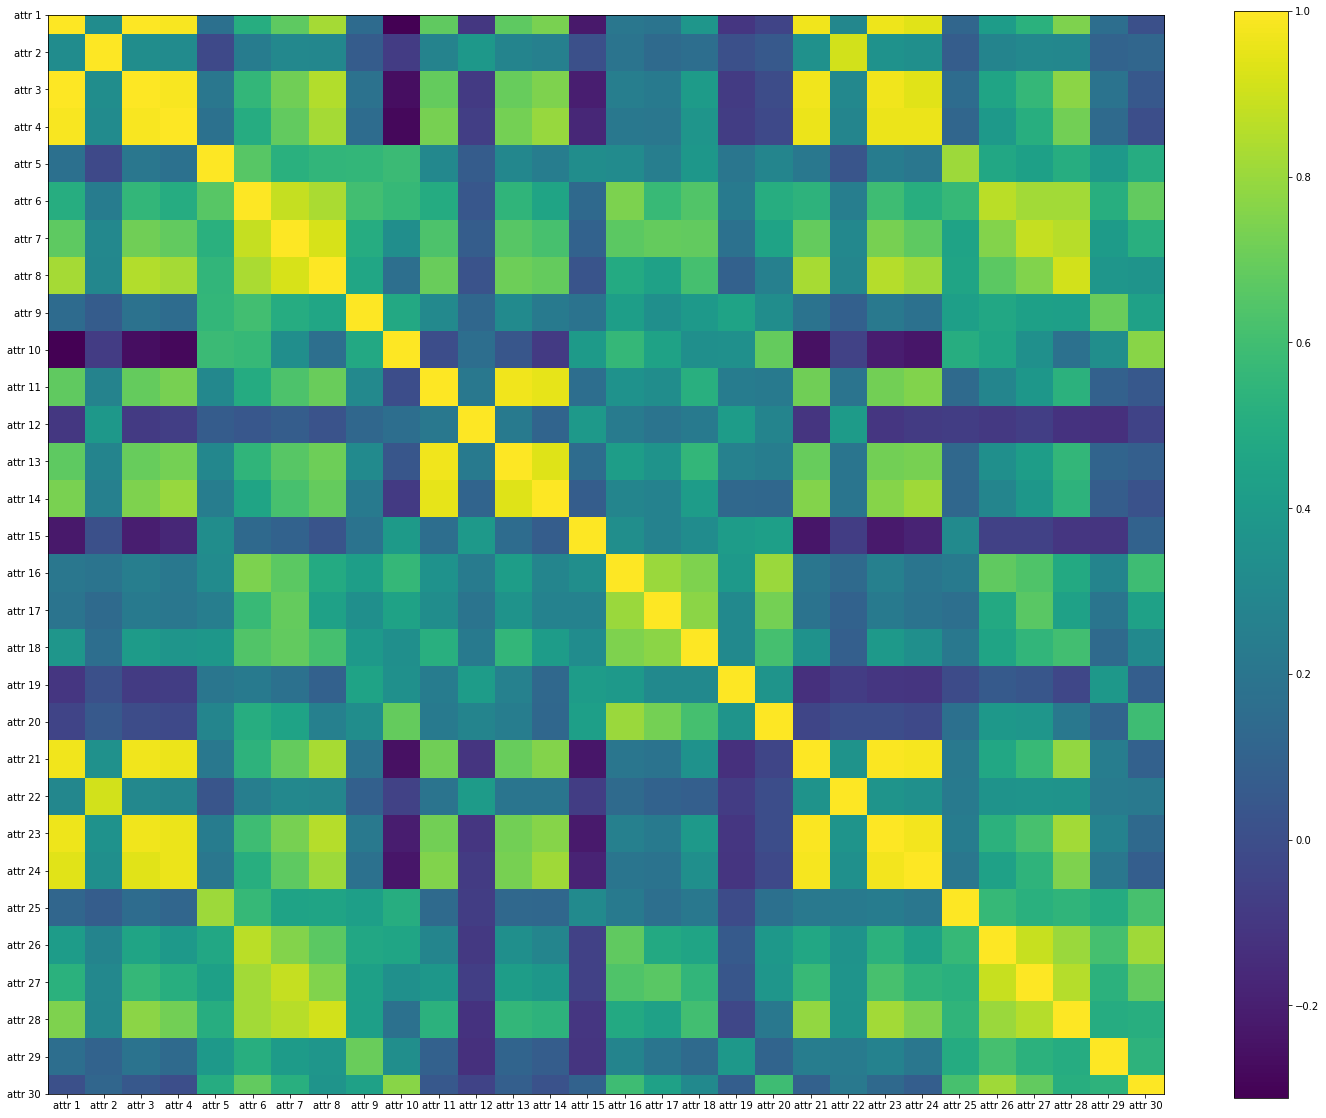

In [5]:
%matplotlib inline
#Corelation Function
def cor_matrix(matrix) :
  p_cor = matrix.corr(method ='pearson')
  return p_cor


#Correlation for our dataset
#get a copy of the data
p_data = data.iloc[:,2:]
#Call correlation function
p_cor = cor_matrix(p_data)

#print correlation matrix
print(p_cor)

#Visualizing the correlation matrix
plt.figure(figsize = (25,20))
im = plt.imshow(p_cor)
plt.colorbar(im)
plt.xticks(range(len(p_cor.columns)), p_cor.columns)
plt.yticks(range(len(p_cor.columns)), p_cor.columns)
plt.show()


# 2.Preprocessing

zscore normalization

       attr 1    attr 2    attr 3  ...   attr 28   attr 29   attr 30
0    1.097064 -2.073335  1.269934  ...  2.296076  2.750622  1.937015
1    1.829821 -0.353632  1.685955  ...  1.087084 -0.243890  0.281190
2    1.579888  0.456187  1.566503  ...  1.955000  1.152255  0.201391
3   -0.768909  0.253732 -0.592687  ...  2.175786  6.046041  4.935010
4    1.750297 -1.151816  1.776573  ...  0.729259 -0.868353 -0.397100
..        ...       ...       ...  ...       ...       ...       ...
564  2.110995  0.721473  2.060786  ...  1.629151 -1.360158 -0.709091
565  1.704854  2.085134  1.615931  ...  0.733827 -0.531855 -0.973978
566  0.702284  2.045574  0.672676  ...  0.414069 -1.104549 -0.318409
567  1.838341  2.336457  1.982524  ...  2.289985  1.919083  2.219635
568 -1.808401  1.221792 -1.814389  ... -1.745063 -0.048138 -0.751207

[569 rows x 30 columns]


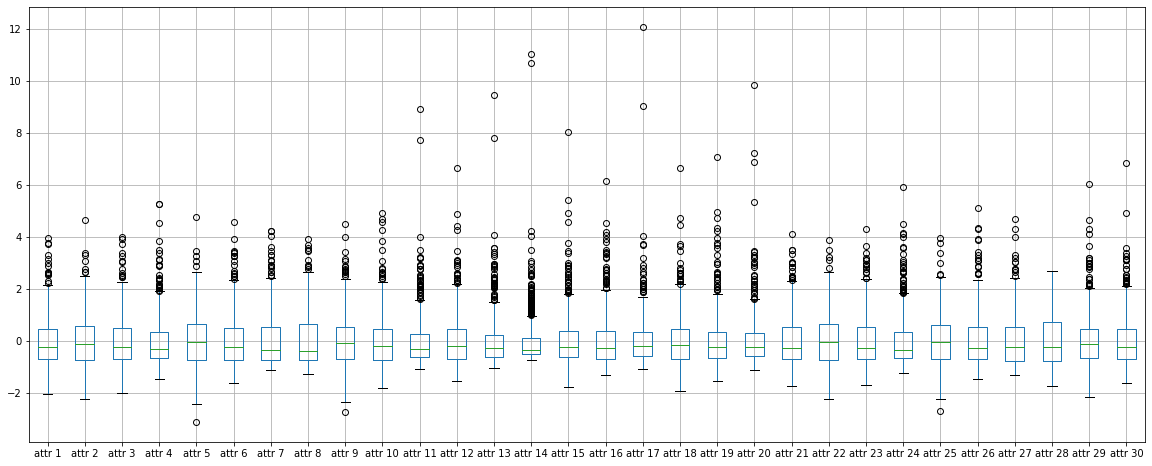

In [0]:
from scipy.stats import zscore
#take copy of data
temp = purified_d.drop('ClassLabel', axis = 1)
temp.head(20)

#apply zscore normalization,ignore any NaN values and leave its value untoushed
zscore_norm = temp.apply(lambda x: x if np.std(x) == 0 else zscore(x))

#zscore_norm = zscore(seg_full_data)
print(zscore_norm)

#boxplot
zscore_norm.boxplot(figsize=[20,8])
plt.show()

Dimentionality reduction using PCA

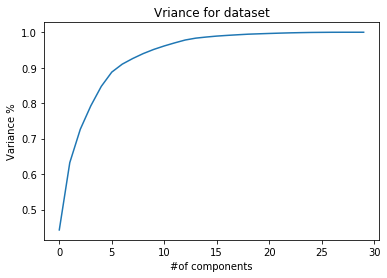

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396]


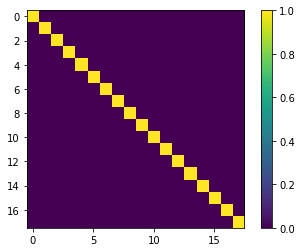

,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652750,0.147642,0.348266,-0.195214
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555,-0.069975,-0.138184,0.293495,-0.109046
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090998,-0.232648,-0.065615,0.021108
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229591,-0.061047,-0.168514,-0.306874


,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18,Id,ClassLabel
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,842302,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,842517,M
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,84300903,M
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,84348301,M
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,84358402,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652750,0.147642,0.348266,-0.195214,926424,M
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555,-0.069975,-0.138184,0.293495,-0.109046,926682,M
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090998,-0.232648,-0.065615,0.021108,926954,M
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229591,-0.061047,-0.168514,-0.306874,927241,M


,Id,ClassLabel,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18,attr 19,attr 20,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
from sklearn.decomposition import PCA
id_col = data['Id']
#get the pca handler
pca = PCA().fit(zscore_norm)

#figure out the suitable number of components to pick
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('#of components')
plt.ylabel('Variance %')
plt.title('Vriance for dataset')
plt.show()
print (pca.explained_variance_ratio_.cumsum())


#The plot shows that using about 18 components would be sufficient
#to achieve 99.288% of variance
pca_18 = PCA(n_components=18)
pca_data = pd.DataFrame(data = pca_18.fit_transform(zscore_norm),
                      columns = zscore_norm.columns[0:18],
                       index =zscore_norm.index)

#variance
print(pca_18.explained_variance_ratio_)
#getting correlation matrix
p_cor = cor_matrix(pca_data)

#show correlation matrix
im = plt.imshow(p_cor)
plt.colorbar(im)
plt.show()

#adding class label and Id columns
display(pca_data)
pca_data['Id'] = id_col
pca_data['ClassLabel'] = c
display(pca_data)
display(data)



> **Data Splitting**



In [13]:
temp_data = purified_d.drop(['ClassLabel'], axis = 1)
train_index, test_index = split(temp_data, c)
results ={}
train_data2 = data.iloc[train_index]
test_data2 = data.iloc[test_index]
DTC = DecisionTreeClassifier(max_depth = 5 ,random_state=0)
results[DTC.__class__.__name__] = classify(DTC, train_data2, test_data2)

ABC = AdaBoostClassifier(n_estimators=100, learning_rate = 1,random_state=0)
results[ABC.__class__.__name__] = classify(ABC, train_data2, test_data2)

clas = RandomForestClassifier(random_state=42, n_jobs=-1)  
results[clas.__class__.__name__] = classify(clas, train_data2, test_data2)

display(results)


[433  48  30 405 560 374 140 309 538 179  98  41 216 473 458 452  89 564
 519 566  69 264 380  14 328 299 125 414 186 102 407 459 194 288  47 319
 394 389 285 213 555 248 387 227  79 101  46  51 169 250 373 478 400 326
 343 492 137 136 315  53 545 449 245 418  32 303 474 268 427  61 205 410
 279 329 412 562 440 494  31 551   8 175 517 166 302 222 334  16 266 197
 187 437 518 260 123 480 318 149 156 306 554 378 271 201 277 548 332 143
 177 225 178 532 511 512  81 293 100 219 128 295 301 552 292 130 349 291
 392 116 119 411 413 481 501 509 184  26 193  35 287 428 278 331 236 200
 441 256 350  73 138  80 388 106 385 531 155 401 537 283 298 379 469 307
  42  66 240  68 337 206 514 246 258  24 565 204  20  40 422  59 432 406
 171 421 486 505 126  28 496 253   7 535 270 324 443 228 462 203 424 131
 358  63  92  97 214 314 396 485 467 103 192  19 218 477 502 117 252 397
 158 269 104 336 330 352 289 226 230 561  12 476 420 113 127 165  65 550
 453 145 150 487  44 107 242  21 232 185 244 257 38

array([[147,   1],
       [  0, 250]])

Confusion matrix for testing data predicions is :


array([[57,  7],
       [10, 97]])

{'ftest': 0.858433734939759,
 'ftrain': 0.998641304347826,
 'test_acc': 0.9005847953216374,
 'test_prec': 0.8507462686567164,
 'test_rec': 0.890625,
 'train_acc': 0.9974874371859297,
 'train_prec': 1.0,
 'train_rec': 0.9932432432432432}

Confusion matrix for training data predicions is :


array([[148,   0],
       [  0, 250]])

Confusion matrix for testing data predicions is :


array([[ 58,   6],
       [  3, 104]])

{'ftest': 0.9415584415584415,
 'ftrain': 1.0,
 'test_acc': 0.9473684210526315,
 'test_prec': 0.9508196721311475,
 'test_rec': 0.90625,
 'train_acc': 1.0,
 'train_prec': 1.0,
 'train_rec': 1.0}

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix for training data predicions is :


array([[146,   2],
       [  0, 250]])

Confusion matrix for testing data predicions is :


array([[ 62,   2],
       [  4, 103]])

{'ftest': 0.9451219512195123,
 'ftrain': 0.9972677595628416,
 'test_acc': 0.9649122807017544,
 'test_prec': 0.9393939393939394,
 'test_rec': 0.96875,
 'train_acc': 0.9949748743718593,
 'train_prec': 1.0,
 'train_rec': 0.9864864864864865}

{'AdaBoostClassifier': {'ftest': 0.9415584415584415,
  'ftrain': 1.0,
  'test_acc': 0.9473684210526315,
  'test_prec': 0.9508196721311475,
  'test_rec': 0.90625,
  'train_acc': 1.0,
  'train_prec': 1.0,
  'train_rec': 1.0},
 'DecisionTreeClassifier': {'ftest': 0.858433734939759,
  'ftrain': 0.998641304347826,
  'test_acc': 0.9005847953216374,
  'test_prec': 0.8507462686567164,
  'test_rec': 0.890625,
  'train_acc': 0.9974874371859297,
  'train_prec': 1.0,
  'train_rec': 0.9932432432432432},
 'RandomForestClassifier': {'ftest': 0.9451219512195123,
  'ftrain': 0.9972677595628416,
  'test_acc': 0.9649122807017544,
  'test_prec': 0.9393939393939394,
  'test_rec': 0.96875,
  'train_acc': 0.9949748743718593,
  'train_prec': 1.0,
  'train_rec': 0.9864864864864865}}

In [0]:
def split(data, labels):
  # 30 % data to be tested 
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
    for train_index, test_index in sss.split(data, labels):
        print(train_index)
        x_train, x_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    return train_index, test_index

In [0]:
train_index, test_index = split(pca_data.iloc[:,len(pca_data.columns)-1], pca_data.iloc[:,-1])


[405 390 129 535 138 299 459  76 171 345 183   9 185 325 216 475 119 425
 259 551 423 491 361 263 144 196 162 563  83 455 130 219 229 333 368  15
  58  62 120 200 311 542 260 199 402 124 279 392 426  14 403 118 438  61
 523 243 472 202 321 547 540 244  90 418 288 457 295 273 283 195 224 265
 181 228 169 211 146 473 344 249 150 537 566 334 387  21 532 235 362   8
 134 364 513 531 450 498 238  75 198 170 499 372 187 236  77 329 105 227
  43 210 509  19 328 451 447  93 145 179 115  35 528   6  48  92 349 271
 568 399 465 127 116 432  86 385 484  82 332 218 417  88 389   3 408  73
 103   1 521 107 412 205 485  99 274 347 483 464 182 429 184 515 494 445
 157  84 343 428 454 560 270 177 155 348 291 440 136 413   2  34  87  52
 278 101  27 373 140 331 267 113  72  16 477 330 561 188 190 400 132 378
  12 422 482 554 126 193 441  85 366  94 435 217  71 165 558 246  50  51
 284  98 237 443 303  20 142 221 110  10 437 431 520 376 240 167 453 356
 277 327 507  53  49 257 375 562  24 500  37 514 19

In [0]:
train_data = pca_data.iloc[train_index]
test_data = pca_data.iloc[test_index]
print(train_data)
print(test_data)

       attr 1    attr 2    attr 3  ...   attr 18        Id  ClassLabel
405 -2.346187  0.682741  1.132734  ... -0.121596    904971           B
390 -3.643380  0.786860 -1.162146  ...  0.067288  90317302           B
129  4.643691 -1.482017 -1.170681  ... -0.138743    866674           M
535  5.165411 -2.382203 -0.422277  ... -0.012029    919555           M
138  3.782026  0.860382  3.671001  ... -0.428735    868826           M
..        ...       ...       ...  ...       ...       ...         ...
172  2.819368  1.265103 -2.153144  ... -0.499194     87164           M
305 -3.074436 -0.306058  1.259254  ...  0.077905    893061           B
427 -2.314247  0.402031  0.274623  ...  0.176610     90745           B
18   4.948704 -4.114334 -0.314749  ... -0.270746    849014           M
508 -1.166535 -1.665694 -0.737878  ...  0.404589    915452           B

[398 rows x 20 columns]
       attr 1    attr 2    attr 3  ...   attr 18       Id  ClassLabel
298 -2.787096 -2.533034 -0.884034  ...  0.032713   89

# 3. Classification




> **a. Classification models:**



In [0]:
clas_results = {}

In [0]:
#To be tested
from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score

def classify(clas, train_data, test_data) :
  train_x = train_data.drop(columns="ClassLabel")
  train_y = train_data['ClassLabel']
  test_x = test_data.drop(columns="ClassLabel")
  test_y = test_data['ClassLabel']
  temp = {}

  clas.fit(train_x, train_y)

  train_pred = clas.predict(train_x)
  #display(train_pred)
  test_pred = clas.predict(test_x)
  #display(train_y)
  temp['train_acc'] = accuracy_score(train_y, train_pred)
  temp['test_acc'] = accuracy_score(test_y, test_pred)

  #temp['train_prec'],temp['train_rec'],temp['ftrain'], support = precision_recall_fscore_support(train_y, train_pred, pos_label='M')
  #temp['test_prec'],temp['test_rec'],temp['ftest'], support = precision_recall_fscore_support(test_y, test_pred, pos_label='M')

  temp['train_rec'] = recall_score(train_y, train_pred, pos_label='M')
  temp['test_rec'] = recall_score(test_y, test_pred, pos_label='M')

  temp['train_prec'] = precision_score(train_y, train_pred, pos_label='M')
  temp['test_prec'] = precision_score(test_y, test_pred, pos_label='M')

  temp['ftrain'] = fbeta_score(train_y, train_pred, beta = 0.5, pos_label='M')
  temp['ftest'] = fbeta_score(test_y, test_pred, beta = 0.5, pos_label='M')

  print("Confusion matrix for training data predicions is :")
  display(confusion_matrix(train_y, train_pred, labels=['M', 'B']))
  print("Confusion matrix for testing data predicions is :")
  display(confusion_matrix(test_y, test_pred, labels=['M', 'B']))
  #print("{} trained on {} samples, and tests predicted with accuracy {} and fscore {}".format(clas.__class__.__name__, len(train_x), temp['test_acc'], temp['ftest']))
  display(temp)
  return temp




*   **Decision Tree**







> select best depth






In [0]:
def decision_tree_classifier_param_selection(X, y):
    depth = [5, 7, 10, 15, 20, 50]
    DTC = DecisionTreeClassifier(random_state=0)
    param_grid = {'max_depth': depth}
    grid_search = GridSearchCV(DTC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [0]:
decision_tree_classifier_param_selection(train_data.drop(columns="ClassLabel"),  train_data['ClassLabel'])


{'max_depth': 5}

**Train the model**

In [0]:
#clas_results[clas.__class__.__name__] = classify(clas, train_data, test_data)
DTC = DecisionTreeClassifier(max_depth = 5 ,random_state=0)
clas_results[DTC.__class__.__name__] = classify(DTC, train_data, test_data)
#DTC.fit(train_data.drop(columns="ClassLabel"),  train_data['ClassLabel'])

Confusion matrix for training data predicions is :


array([[148,   0],
       [  1, 249]])

Confusion matrix for testing data predicions is :


array([[ 56,   8],
       [  5, 102]])

{'ftest': 0.9090909090909091,
 'ftrain': 0.9946236559139786,
 'test_acc': 0.9239766081871345,
 'test_prec': 0.9180327868852459,
 'test_rec': 0.875,
 'train_acc': 0.9974874371859297,
 'train_prec': 0.9932885906040269,
 'train_rec': 1.0}



*   **AdaBoost**



In [0]:
def ABC_praram_selection(train_data, labels ) :
    n_estimators = [10, 50, 100, 200, 500]
    learning_rate = [0.25, 0.5, 1, 1.5, 2, 3]
    ABC = AdaBoostClassifier(random_state=0)
    param_grid = {'n_estimators': n_estimators, 'learning_rate' : learning_rate}
    grid_search = GridSearchCV(ABC, param_grid, cv=10)
    grid_search.fit(train_data, labels)
    grid_search.best_params_
    return grid_search.best_params_

In [0]:
ABC_praram_selection(train_data.drop(columns="ClassLabel"),  train_data['ClassLabel'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.5, 'n_estimators': 200}



> Train Model 



In [0]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate = 1,random_state=0)
clas_results[ABC.__class__.__name__] = classify(ABC, train_data, test_data)


Confusion matrix for training data predicions is :


array([[148,   0],
       [  0, 250]])

Confusion matrix for testing data predicions is :


array([[ 59,   5],
       [  7, 100]])

{'ftest': 0.899390243902439,
 'ftrain': 1.0,
 'test_acc': 0.9298245614035088,
 'test_prec': 0.8939393939393939,
 'test_rec': 0.921875,
 'train_acc': 1.0,
 'train_prec': 1.0,
 'train_rec': 1.0}

**Test for different values for hyper parameters (50, 0.5)**



In [0]:
ABC = AdaBoostClassifier(n_estimators=50, learning_rate = 0.5,random_state=0)
clas_results['ABC.__class__.__name__'] = classify(ABC, train_data, test_data)

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

423    B
352    M
536    M
144    B
505    B
      ..
419    B
271    B
232    B
469    B
74     B
Name: ClassLabel, Length: 398, dtype: object

{'ftest': 0.9651898734177214,
 'ftrain': 1.0,
 'test_acc': 0.9707602339181286,
 'test_prec': 0.9682539682539683,
 'test_rec': 0.953125,
 'train_acc': 1.0,
 'train_prec': 1.0,
 'train_rec': 1.0}

**Test for different values for hyper parameters (500, 3)**


In [0]:
ABC = AdaBoostClassifier(n_estimators=500, learning_rate = 3,random_state=0)
clas_results['ABC.__class__.__name__'] = classify(ABC, train_data, test_data)

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M

423    B
352    M
536    M
144    B
505    B
      ..
419    B
271    B
232    B
469    B
74     B
Name: ClassLabel, Length: 398, dtype: object

{'ftest': 0.7932692307692308,
 'ftrain': 0.8829365079365079,
 'test_acc': 0.8011695906432749,
 'test_prec': 0.9166666666666666,
 'test_rec': 0.515625,
 'train_acc': 0.8517587939698492,
 'train_prec': 1.0,
 'train_rec': 0.6013513513513513}



*   **Random Forest**


In [0]:
def RFparam_tune(clas, train_data, test_data, parameters) :
  grid_search = GridSearchCV(estimator = clas, param_grid = parameters, 
                            n_jobs = -1)
  grid_fit = grid_search.fit(train_data.drop('ClassLabel', axis = 1), train_data['ClassLabel'])
  # Get the best estimator
  best_clas = grid_fit.best_estimator_
  return best_clas

In [0]:
parameters = {
    'max_depth': range(50, 100, 10),
    'n_estimators': range(100,1000,100)
}
clas = RandomForestClassifier(random_state=42, n_jobs=-1)  
best_RF = RFparam_tune(clas, train_data, test_data, parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
display(best_RF.get_params())
clas_results[best_RF.__class__.__name__] = classify(best_RF, train_data, test_data)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Confusion matrix for training data predicions is :


array([[148,   0],
       [  0, 250]])

Confusion matrix for testing data predicions is :


array([[ 54,  10],
       [  7, 100]])

{'ftest': 0.8766233766233767,
 'ftrain': 1.0,
 'test_acc': 0.9005847953216374,
 'test_prec': 0.8852459016393442,
 'test_rec': 0.84375,
 'train_acc': 1.0,
 'train_prec': 1.0,
 'train_rec': 1.0}



> **b. Hyper-parameter tuning:**



In [0]:
display(clas_results)

{'AdaBoostClassifier': {'ftest': 0.899390243902439,
  'ftrain': 1.0,
  'test_acc': 0.9298245614035088,
  'test_prec': 0.8939393939393939,
  'test_rec': 0.921875,
  'train_acc': 1.0,
  'train_prec': 1.0,
  'train_rec': 1.0},
 'DecisionTreeClassifier': {'ftest': 0.9090909090909091,
  'ftrain': 0.9946236559139786,
  'test_acc': 0.9239766081871345,
  'test_prec': 0.9180327868852459,
  'test_rec': 0.875,
  'train_acc': 0.9974874371859297,
  'train_prec': 0.9932885906040269,
  'train_rec': 1.0},
 'RandomForestClassifier': {'ftest': 0.8766233766233767,
  'ftrain': 1.0,
  'test_acc': 0.9005847953216374,
  'test_prec': 0.8852459016393442,
  'test_rec': 0.84375,
  'train_acc': 1.0,
  'train_prec': 1.0,
  'train_rec': 1.0}}



> **c. Evaluation:**



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


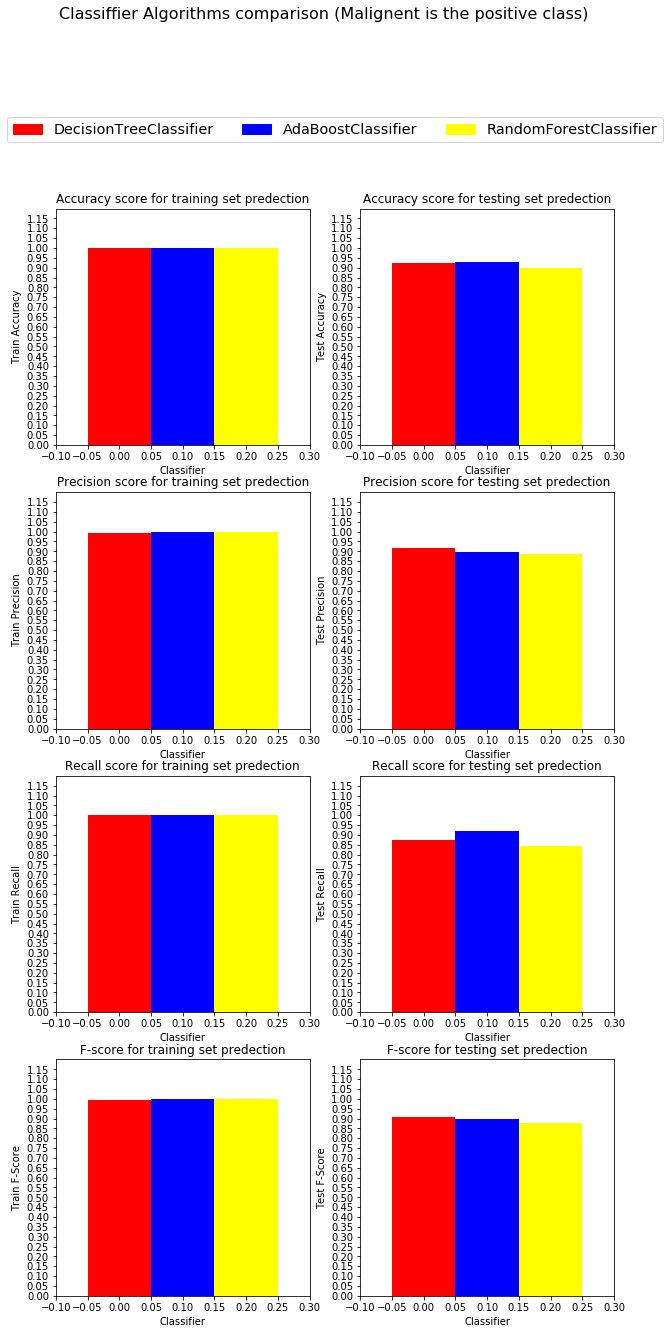

In [0]:
colors = ['red', 'blue', 'yellow']
bar_width = 0.1
fig, ax = plt.subplots(4, 2, figsize = (10,20))
for k, classifier in enumerate(clas_results.keys()):
        # metric
        for j, metric in enumerate(['train_acc', 'test_acc', 'train_prec', 'test_prec', 'train_rec', 'test_rec', 'ftrain', 'ftest']):
              # Creative plot code
              ax[int(j/2), j%2].bar(k*bar_width, clas_results[classifier][metric], width=bar_width, color=colors[k])
              ax[int(j/2), j%2].set_xlabel("Classifier")
              ax[int(j/2), j%2].set_xlim((-0.1, 0.3))
#limits
ax[0, 0].set_ylim((0, 1.2))
ax[0, 1].set_ylim((0, 1.2))

ax[1, 0].set_ylim((0, 1.2))
ax[1, 1].set_ylim((0, 1.2))

ax[2, 0].set_ylim((0, 1.2))
ax[2, 1].set_ylim((0, 1.2))

ax[3, 0].set_ylim((0, 1.2))
ax[3, 1].set_ylim((0, 1.2))

#ticks
ax[0, 0].set_yticks(np.arange(0, 1.2, 0.05))
ax[0, 1].set_yticks(np.arange(0, 1.2, 0.05))

ax[1, 0].set_yticks(np.arange(0, 1.2, 0.05))
ax[1, 1].set_yticks(np.arange(0, 1.2, 0.05))

ax[2, 0].set_yticks(np.arange(0, 1.2, 0.05))
ax[2, 1].set_yticks(np.arange(0, 1.2, 0.05))

ax[3, 0].set_yticks(np.arange(0, 1.2, 0.05))
ax[3, 1].set_yticks(np.arange(0, 1.2, 0.05))

#xlabels
ax[0, 0].set_ylabel("Train Accuracy")
ax[0, 1].set_ylabel("Test Accuracy")

ax[1, 0].set_ylabel("Train Precision")
ax[1, 1].set_ylabel("Test Precision")

ax[2, 0].set_ylabel("Train Recall")
ax[2, 1].set_ylabel("Test Recall")

ax[3, 0].set_ylabel("Train F-Score")
ax[3, 1].set_ylabel("Test F-Score")

#Titles
ax[0, 0].set_title("Accuracy score for training set predection")
ax[0, 1].set_title("Accuracy score for testing set predection")

ax[1, 0].set_title("Precision score for training set predection")
ax[1, 1].set_title("Precision score for testing set predection")

ax[2, 0].set_title("Recall score for training set predection")
ax[2, 1].set_title("Recall score for testing set predection")

ax[3, 0].set_title("F-score for training set predection")
ax[3, 1].set_title("F-score for testing set predection")

# Create patches for the legend
patches = []
for i, classifier in enumerate(clas_results.keys()):
  patches.append(mpatches.Patch(color = colors[i], label = classifier))

plt.legend(handles = patches, bbox_to_anchor=(-0.1, 5), \
         loc = 'upper center', ncol = 3, fontsize = 'x-large',  borderaxespad = 0.2)

plt.suptitle("Classiffier Algorithms comparison (Malignent is the positive class) ", fontsize = 16, y = 1.02)
plt.tight_layout()
plt.show()
